In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
data = np.loadtxt('/d/scratch/ASTR5160/week13/line.data')

In [28]:
variance = [ np.var(data.T[i], ddof=1) for i in range(10) ]
mean = [ np.mean(data.T[i]) for i in range(10) ]

y_data = np.vstack((mean, variance))

In [51]:
def ln_likelihood(m, b, data):
    '''
    calculate the ln(likelihood) based on Gaussian distribution 
    for fitting linear line with m, b and given data.
    '''
    
    y = data[0]
    sigma = data[1]
    x = np.arange(0, len(data[0])) + 0.5
    return -1/2 * np.sum((y - m * x - b)**2 / sigma**2 + np.log(2 * np.pi * sigma**2))

In [34]:
def flat_prior(low, upper, x):
    '''
    flat prior function with low and upper bound.
    '''
    
    if x > upper or x < low: return -np.inf
    return 1 / (upper - low)

In [41]:
def judge_parameter(ln_p_new, ln_p_old):
    '''
    judge the posterior probability and decide whether accept or not.
    '''
    
    if ln_p_new > ln_p_old:
        return True
    else:
        return np.random.uniform() <= np.exp(ln_p_new - ln_p_old)

In [68]:
step_size = 0.1
low, upp = 0, 8
i, step = 0, 10000

m, b = 3, 5.5
ln_prior = np.log(flat_prior(low, upp, m) * flat_prior(low, upp, b))
like = ln_likelihood(m, b, y_data) + ln_prior
chain = [[m, b, like]]

while True:
    # end statement, but I feel the better way to do
    # is to have some convergence measurement
    if i >= step:
        break
    i += 1
    
    # update m and b based on gaussian
    m_tmp = np.random.normal(m, step_size)
    b_tmp = np.random.normal(b, step_size)
    
    # calculate the new posterior probability
    ln_prior = np.log(flat_prior(low, upp, m_tmp) * flat_prior(low, upp, b_tmp))
    like_new = ln_likelihood(m_tmp, b_tmp, y_data) + ln_prior
    if judge_parameter(like_new, like):
        m, b, like = m_tmp, b_tmp, like_new
        chain.append([m, b, like])

/tmp/ipykernel_1162577/3082225917.py:22: RuntimeWarning: invalid value encountered in log
  ln_prior = np.log(flat_prior(low, upp, m_tmp) * flat_prior(low, upp, b_tmp))


In [69]:
len(chain)/step * 100

77.85

In [70]:
chain = np.array(chain)

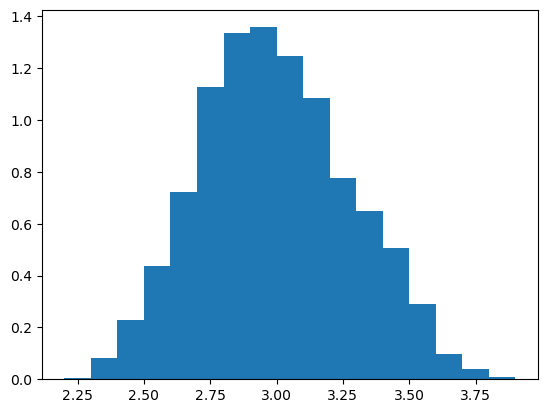

In [86]:
bins = np.arange(2.2, 4, 0.1)
plt.hist(chain[:, 0], density=True, bins=bins)
plt.show()

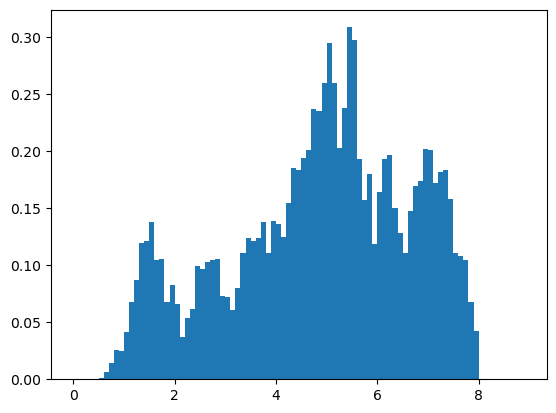

In [83]:
bins = np.arange(0, 9, 0.1)
plt.hist(chain[:, 1], density=True, bins=bins)
plt.show()

## The most probable value for m and b are 3 and 5.5